In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import pandas as pd

In [11]:
data = pd.read_csv("sentiment_analysis.csv")

In [12]:
data

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [13]:
sentences = data['text'].values
labels = data['sentiment'].values

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [17]:
vocab_size = 5000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [18]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [19]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')])

C:\Users\perumal\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
num_epochs = 10
history = model.fit(padded_sequences, labels, epochs=num_epochs, verbose=2)

Epoch 1/10
16/16 - 4s - 234ms/step - accuracy: 0.3687 - loss: 1.0949
Epoch 2/10
16/16 - 0s - 9ms/step - accuracy: 0.3988 - loss: 1.0883
Epoch 3/10
16/16 - 0s - 7ms/step - accuracy: 0.3988 - loss: 1.0856
Epoch 4/10
16/16 - 0s - 6ms/step - accuracy: 0.3988 - loss: 1.0842
Epoch 5/10
16/16 - 0s - 6ms/step - accuracy: 0.3988 - loss: 1.0835
Epoch 6/10
16/16 - 0s - 6ms/step - accuracy: 0.3988 - loss: 1.0823
Epoch 7/10
16/16 - 0s - 6ms/step - accuracy: 0.3988 - loss: 1.0819
Epoch 8/10
16/16 - 0s - 6ms/step - accuracy: 0.3988 - loss: 1.0809
Epoch 9/10
16/16 - 0s - 7ms/step - accuracy: 0.3988 - loss: 1.0814
Epoch 10/10
16/16 - 0s - 7ms/step - accuracy: 0.3988 - loss: 1.0808


In [22]:
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

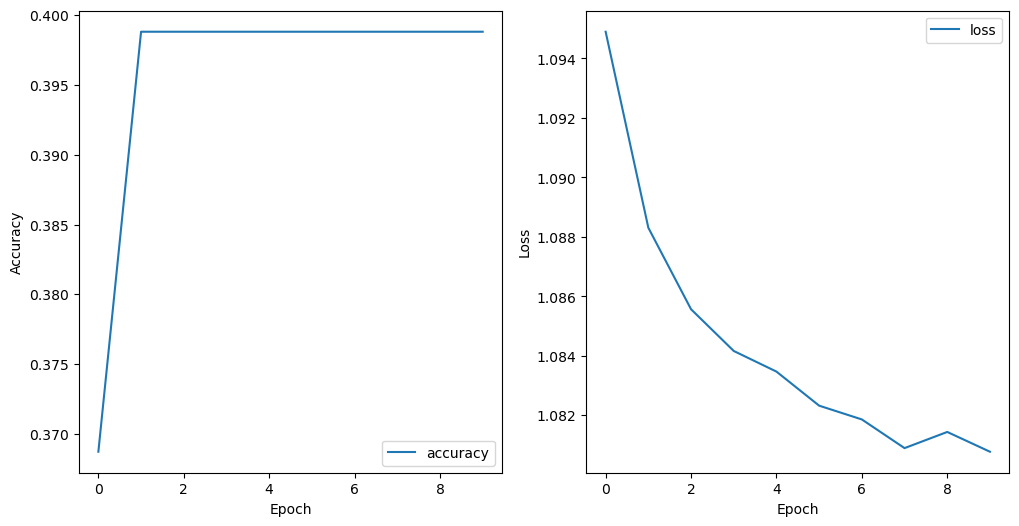

In [23]:
plot_history(history)

In [24]:
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    prediction = model.predict(padded)
    predicted_label = np.argmax(prediction)
    
    sentiment_label = label_encoder.inverse_transform([predicted_label])[0]
    return sentiment_label

In [29]:
import numpy as np
test_sentence = "The product is okay, nothing special."
predicted_sentiment = predict_sentiment(test_sentence)
print(f"Predicted Sentiment for '{test_sentence}': {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Sentiment for 'The product is okay, nothing special.': neutral
